In [1]:
#Figuregenerating based on pickle-files from datastructuring.ipynb

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.dates as mdates
import cmocean

pd.__version__

'2.1.4'

In [2]:
def tplot(plotData, title, ylabel,legend,filename,lines=False):
    fig,ax = plt.subplots()
    ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(base=1))
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y"))
    plt.rcParams['figure.figsize'] = [14, 7]
    ax.plot(plotData,label=legend,color="#0072b2")
    plt.xticks(fontsize=20, rotation=45)
    plt.yticks(fontsize=20)
    plt.ylabel(ylabel,fontsize=20)
    plt.xlabel("Time [Years since birth of Jesus Christ - Gregorian calendar]",fontsize=20)
    plt.title(title,fontsize=20)
    plt.axhline(y = 0,color="k",linestyle="--",alpha=.5)
    plt.gcf().subplots_adjust(bottom=0.2)
    plt.subplots_adjust(bottom=0.2)

    if lines:
        colors = ["#e69f00","#009e73"]
        for i in range(0,len(turnover_periods),2):
            start_period = turnover_periods['datetime'].iloc[i]
            end_period = turnover_periods['datetime'].iloc[i + 1]
            if pd.notna(start_period):
                if i == 0:
                    ax.axvspan(start_period, end_period, color=colors[int(np.floor(i%4)/2)],label="Fall turnover", alpha=0.5)
                elif i == 2:
                    ax.axvspan(start_period, end_period, color=colors[int(np.floor(i%4)/2)],label="Spring turnover", alpha=0.5)
                else:
                    ax.axvspan(start_period, end_period, color=colors[int(np.floor(i%4)/2)], alpha=0.5)
        plt.legend()
    
    fig.savefig(filename+".png",format="png")
    fig.savefig(filename+".pdf",format="pdf")
    plt.show()
    return 0

def monthly_plot(data,all=False):
    intermediate  = data.resample("1m").mean()
    intermediate2 = intermediate.groupby(intermediate.index.month).mean()
    fig,ax = plt.subplots()
    ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(base=1))
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y"))
    if all:
        shades = np.linspace(0,1,int(np.ceil(len(intermediate)/12)))
        for i in range(0,len(intermediate),12):
            plt.plot(intermediate.values[i:i+12],color=('green',shades[int(i/13)]))
    else: 
        plt.plot(intermediate2)
    plt.show()
    return 0

In [4]:
#datareading based on dataformating
flux_data = pd.read_pickle("data/flux_data_kuivajarvi.pkl")
turnover_periods = pd.read_pickle("data/turnover_periods.pkl")
water_temps = pd.read_pickle("data/waterT_processed.pkl")
par_data = pd.read_pickle("data/par_kuivajarvi.pkl")
mean_turnovers = pd.read_pickle("data/mean_turnovers.pkl")

#Thermocline data
lake_analyzer = pd.read_csv("data/Kuivajarvi_results_lake_analyzer.csv").drop(['Unnamed: 0'],axis=1)
lake_analyzer["DateTime"]=pd.to_datetime(lake_analyzer["DateTime"])
lake_analyzer=lake_analyzer.set_index("DateTime")

# mean wind
MeanYear_wind_daily = pd.read_pickle("data/MeanYear_wind_daily.pkl")
MeanYear_wind_daily=MeanYear_wind_daily.set_index("dates_waterT")
# radiation data
radiation_data = pd.read_pickle("data/rad_kuivajarvi.pkl")

#manual 
manual_concentrations = pd.read_csv("data/Manual_meas_CO2.csv")
manual_concentrations["datetime"] = pd.to_datetime(manual_concentrations["datetime"])
manual_concentrations=manual_concentrations.set_index("datetime")
#manual_concentrations["co2"] = (manual_concentrations["co2"])*368
MeanYear_wind_daily

,windSpeed,day_of_year
dates_waterT,,
2012-01-02,2.191811,2.0
2012-01-03,1.795089,3.0
2012-01-04,2.315478,4.0
2012-01-05,2.241517,5.0
2012-01-06,2.871936,6.0
...,...,...
2012-12-28,2.758950,363.0
2012-12-29,3.195967,364.0
2012-12-30,1.728072,365.0


In [5]:
intermediate   = flux_data["KVJ_EDDY.F_CO2_LI72"].where(flux_data["KVJ_EDDY.Qc_CO2_LI72"]==0).resample("1m").mean()
monthly_co2  = intermediate.groupby(intermediate.index.month).mean()

In [6]:
mean_tc = pd.read_csv("data/Kuivajarvi_thermD_MeanYear.txt",delim_whitespace=True).reset_index()
mean_tc["datetime"] = pd.to_datetime(mean_tc["index"])
mean_tc = mean_tc.set_index("datetime").drop(["index","DateTime"], axis=1).resample("1w").mean()


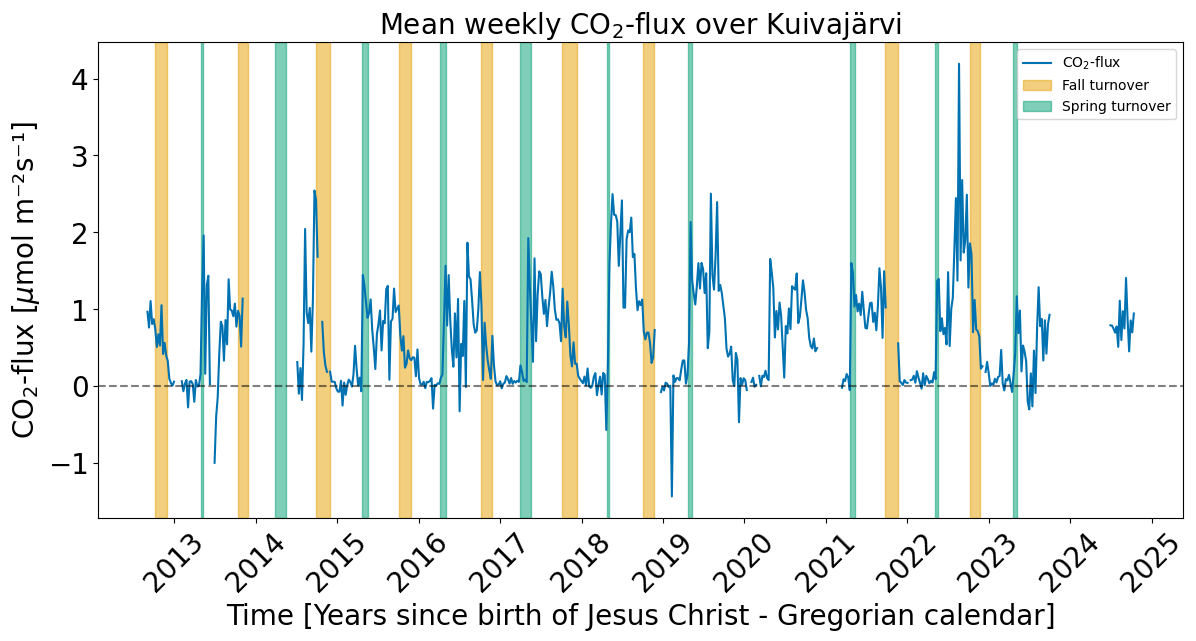

0

In [8]:
#Co2 FLux
tplot(flux_data["KVJ_EDDY.F_CO2_LI72"].where(flux_data["KVJ_EDDY.Qc_CO2_LI72"]==0).resample("1w").mean(), 
      "Mean weekly CO$_2$-flux over Kuivajärvi",
      "CO$_2$-flux [${\mu}$mol m⁻²s⁻¹]",
      "CO$_2$-flux",
      "figs/co2_flux",
      lines=True)


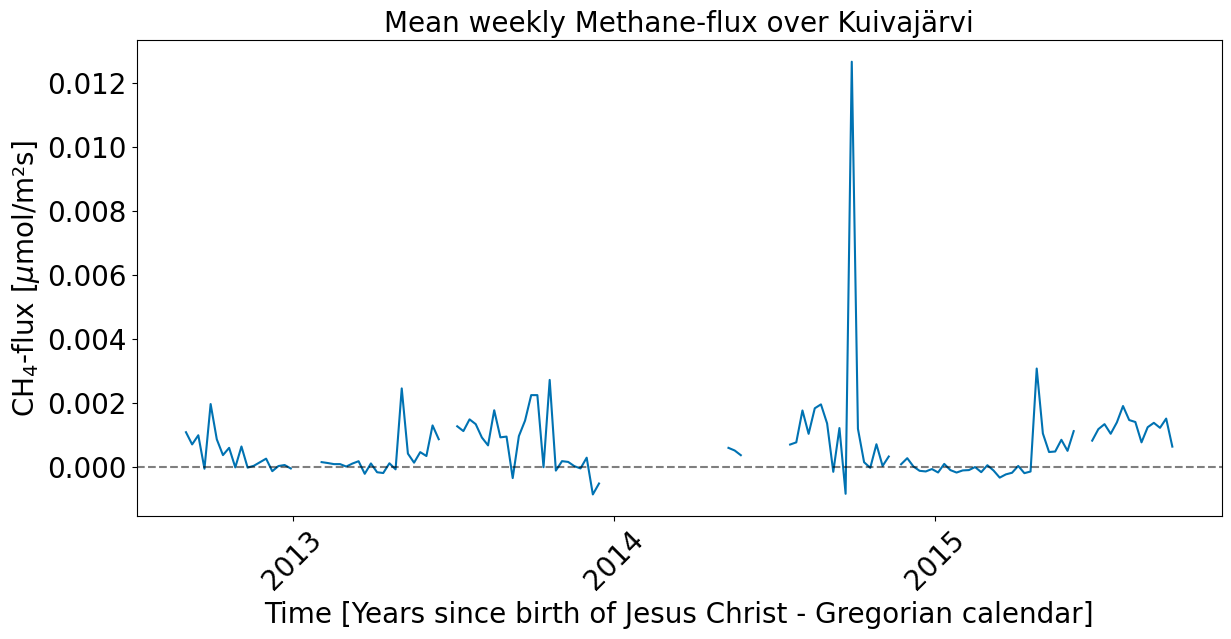

0

In [9]:
#Methane FLux
tplot(flux_data["KVJ_EDDY.F_CH4_PICA"].where(flux_data["KVJ_EDDY.Qc_CH4_PICA"]==0).resample("1w").mean(), 
      "Mean weekly Methane-flux over Kuivajärvi",
      "CH$_4$-flux [${\mu}$mol/m²s]",
      "CH$_4$-flux",
      "figs/co2_flux")

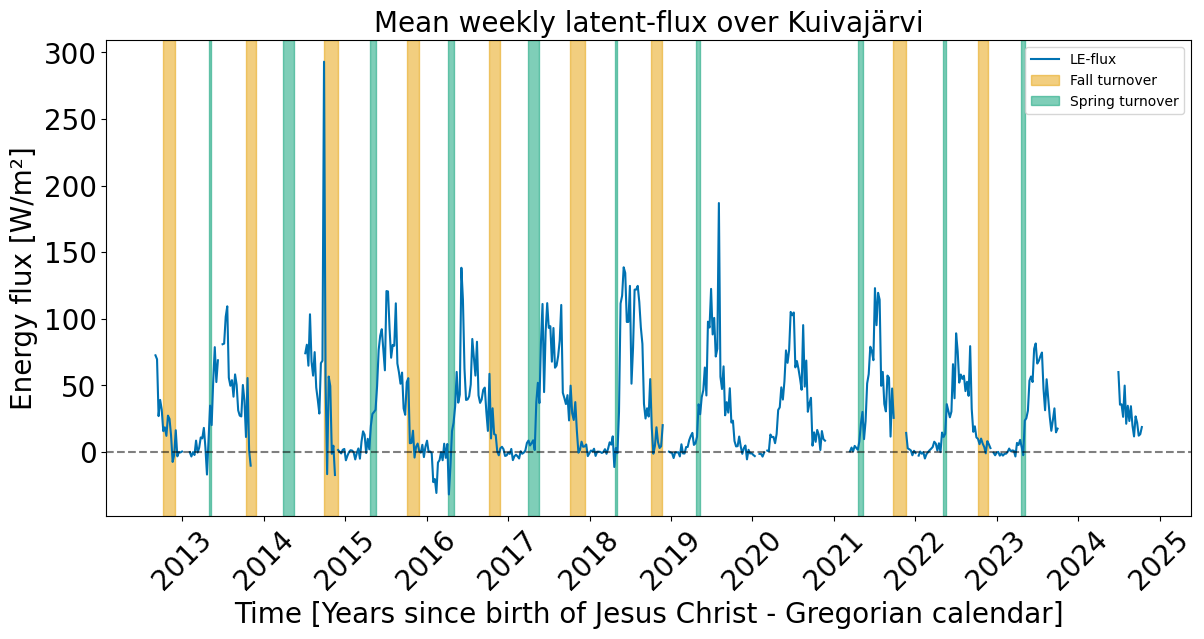

0

In [10]:
#LE FLux
tplot(flux_data["KVJ_EDDY.LE_LI72"].where(flux_data["KVJ_EDDY.Qc_LE_LI72"]==0).resample("1w").mean(), 
      "Mean weekly latent-flux over Kuivajärvi",
      "Energy flux [W/m²]",
      "LE-flux",
      "figs/LE_flux",
      lines=True)

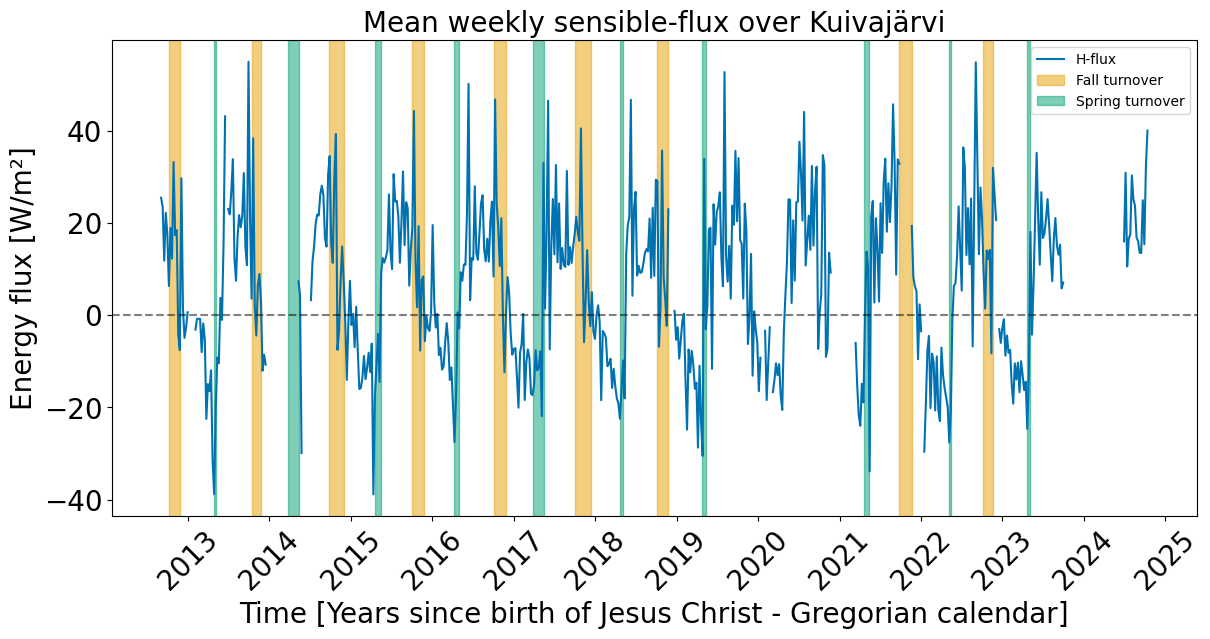

0

In [11]:
#Sensible heat flux 
tplot(flux_data["KVJ_EDDY.H"].where(flux_data["KVJ_EDDY.Qc_H"]==0).resample("1w").mean(), 
      "Mean weekly sensible-flux over Kuivajärvi",
      "Energy flux [W/m²]",
      "H-flux",
      "figs/H_flux",
     lines=True)

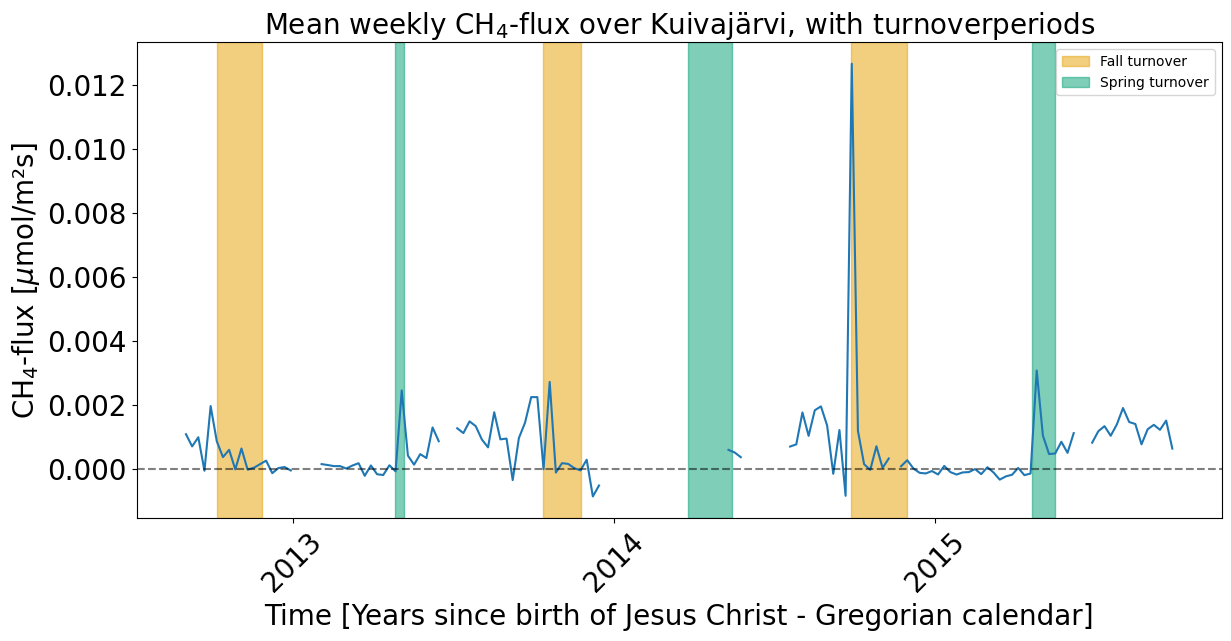

In [12]:
turnover_periods = pd.read_pickle("data/turnover_periods.pkl") #this is the easiest to use
#turnover_periods = pd.read_read("data/turnover_periods.csv")  # this needs to be structured so that it hase a column of datetime.objects

fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(flux_data["KVJ_EDDY.F_CH4_PICA"].where(flux_data["KVJ_EDDY.Qc_CH4_PICA"]==0).resample("1w").mean())
colors = ["#e69f00","#009e73"]
plt.xlabel("Time [Years since birth of Jesus Christ - Gregorian calendar]",fontsize=20)

for i in range(0,11,2):
    start_period = turnover_periods['datetime'].iloc[i]
    end_period = turnover_periods['datetime'].iloc[i + 1]
    if pd.notna(start_period):
        if i == 0:
            ax.axvspan(start_period, end_period, color=colors[int(np.floor(i%4)/2)],label="Fall turnover", alpha=0.5)
        elif i == 2:
            ax.axvspan(start_period, end_period, color=colors[int(np.floor(i%4)/2)],label="Spring turnover", alpha=0.5)
        else:
            ax.axvspan(start_period, end_period, color=colors[int(np.floor(i%4)/2)], alpha=0.5)


ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(base=1))
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y"))
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.ylabel("CH$_4$-flux [${\mu}$mol/m²s]",fontsize=20)
plt.xlabel("Time [Years since birth of Jesus Christ - Gregorian calendar]",fontsize=20)
plt.title("Mean weekly CH$_4$-flux over Kuivajärvi, with turnoverperiods",fontsize=20)
plt.axhline(y = 0,color="k",linestyle="--",alpha=.5)
plt.gcf().subplots_adjust(bottom=0.2)
plt.subplots_adjust(bottom=0.2)
fig.savefig("figs/weeklyCH4FluxTurnoverPeriods.png",format="png")
fig.savefig("figs/weeklyCH4FluxTurnoverPeriods.pdf",format="pdf")
plt.legend()

plt.show()

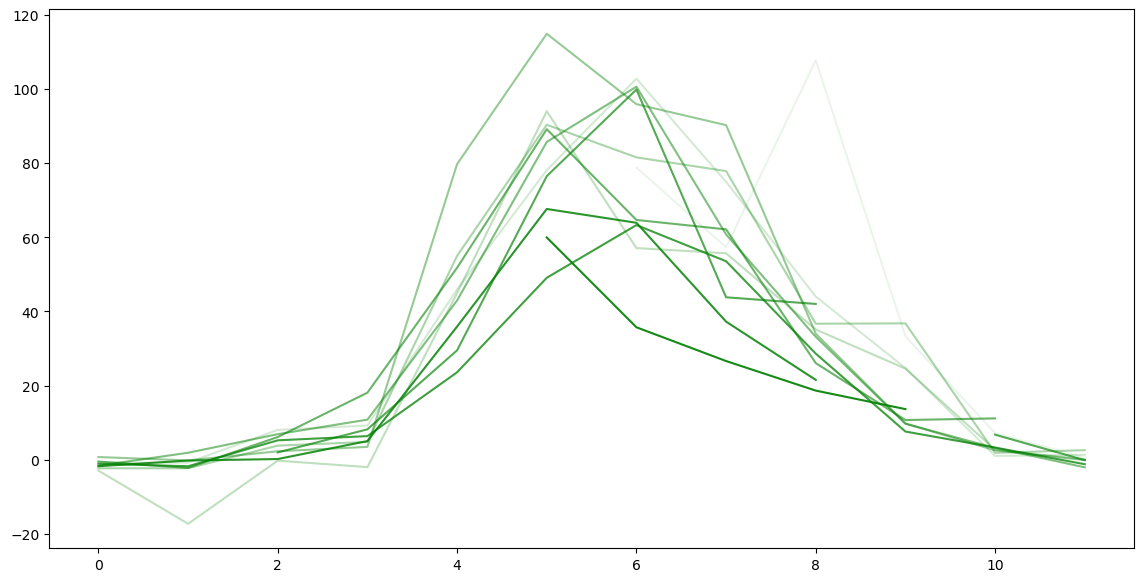

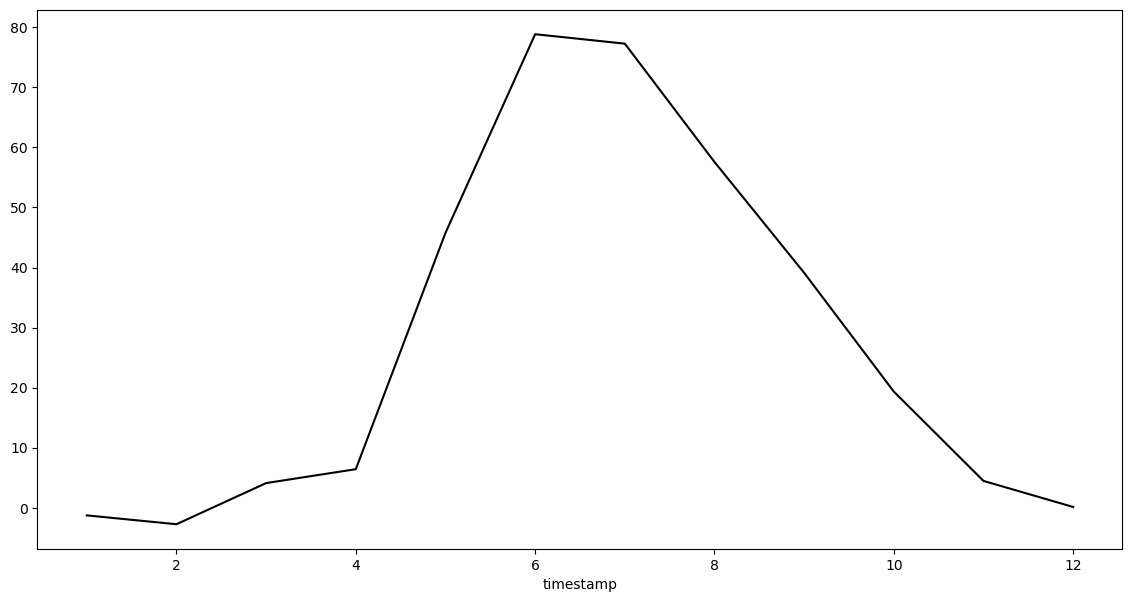

In [13]:
intermediate = flux_data["KVJ_EDDY.LE_LI72"].where(flux_data["KVJ_EDDY.Qc_LE_LI72"]==0).resample("1m").mean()
intermediate2  = intermediate.groupby(intermediate.index.month).mean()
plt.rcParams['figure.figsize'] = [14, 7]
import numpy as np 
shades = np.linspace(0,1,13)
for i in range(0,len(intermediate),12):
    plt.plot(intermediate.values[i:i+12],color=('green',shades[int(i/13)]))

plt.show()

intermediate2.plot(color="k")
mean_year_LE = intermediate2

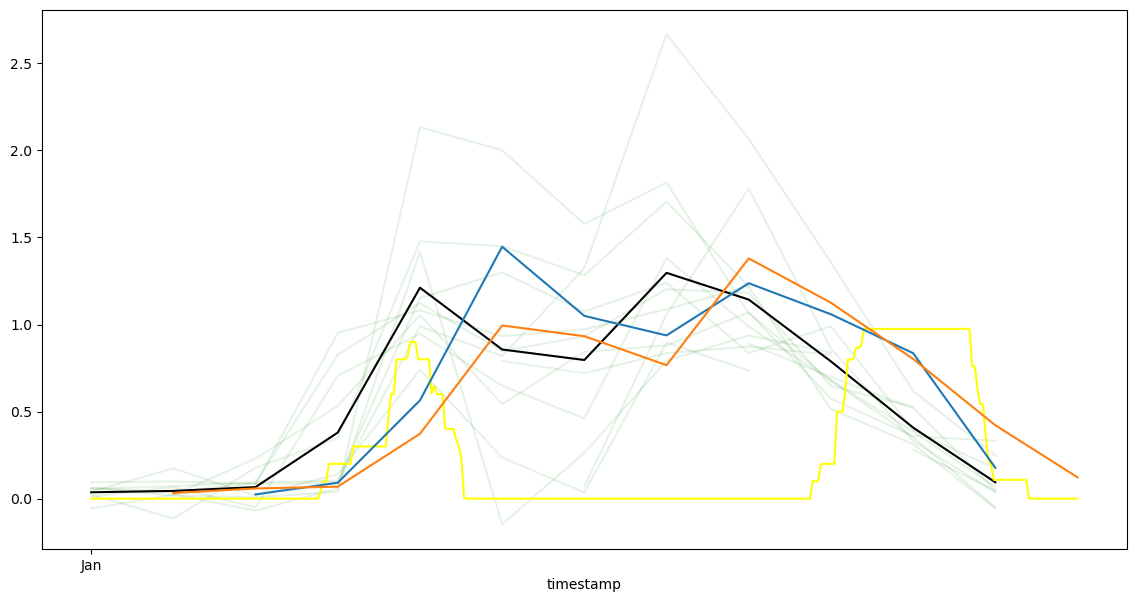

In [14]:
mean_turnovers = pd.read_pickle("data/mean_turnovers.pkl")
intermediate   = flux_data["KVJ_EDDY.F_CO2_LI72"].where(flux_data["KVJ_EDDY.Qc_CO2_LI72"]==0).resample("1m").mean()
monthly_co2  = intermediate.groupby(intermediate.index.month).mean()
import numpy as np 
shades = np.linspace(0,1,13)
for i in range(0,len(intermediate),12):
   plt.plot(intermediate.values[i:i+12],color=('green',.1))
plt.plot(monthly_co2.values,color="k")
plt.plot(np.linspace(0,12,len(mean_turnovers.values.ravel())),1.3*mean_turnovers.values.ravel(),color="yellow")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks on the first day of each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Month names (e.g., Jan, Feb)

daytime_co2 = flux_data["KVJ_EDDY.F_CO2_LI72"].where(flux_data["KVJ_EDDY.Qc_CO2_LI72"]==0).where(radiation_data["KVJ_META.Glob"] > 200).groupby(flux_data.index.month).mean()
nighttime_co2 = flux_data["KVJ_EDDY.F_CO2_LI72"].where(flux_data["KVJ_EDDY.Qc_CO2_LI72"]==0).where(radiation_data["KVJ_META.Glob"] < 200).groupby(flux_data.index.month).mean()

daytime_co2.plot()
nighttime_co2.plot()

import pandas as pd

intermediate = flux_data["KVJ_EDDY.F_CO2_LI72"].where(flux_data["KVJ_EDDY.Qc_CO2_LI72"] == 0).resample("2W").mean()


biweekly_co2 = intermediate.groupby(intermediate.index.isocalendar().week // 2).mean()

biweekly_co2.index.name = 'Biweekly Period'

# Step 1: Filter and resample the data biweekly (14-day intervals)
intermediate = lake_analyzer["thermD"].resample("2W").mean()

# Step 2: Group by the biweekly periods within the year (using week of year)
biweekly_thermocline = intermediate.groupby(intermediate.index.isocalendar().week // 2).mean()

# Optional: Ensure you label or index this data meaningfully if you want to map it back to calendar weeks
# For example, you could rename the index to better reflect the biweekly periods
biweekly_thermocline.index.name = 'Biweekly Period'



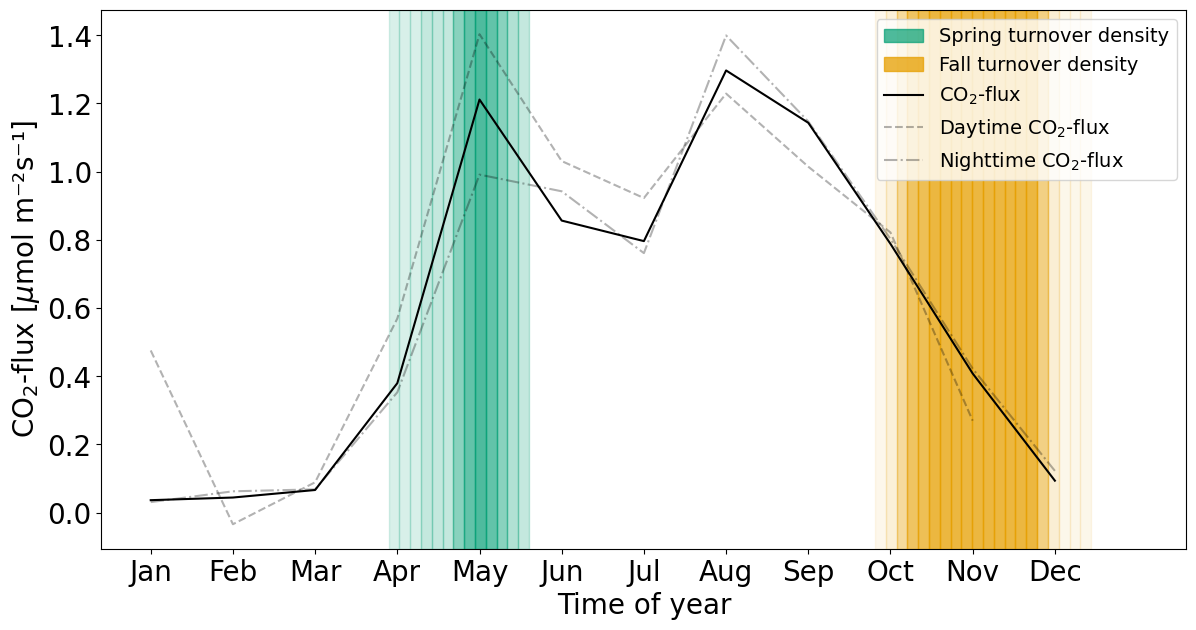

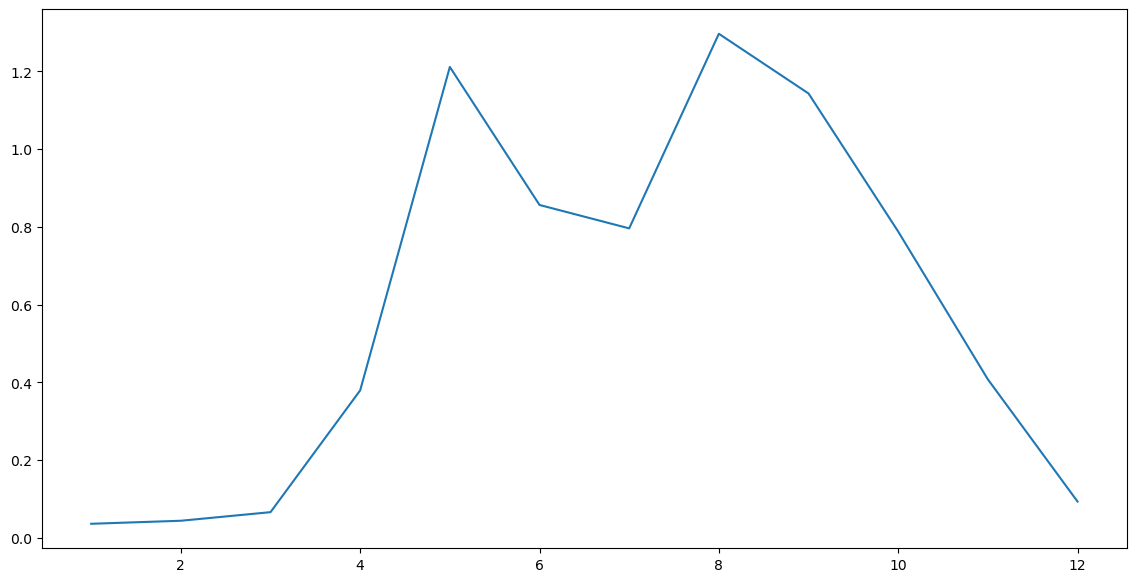

In [20]:
import numpy as np
import matplotlib.pyplot as plt
fontsize=20
x = np.linspace(0, 12, len(mean_turnovers.values.ravel()))

step_size = 4  # 
for i in range(0, 180, step_size):
    if i == 120:
        plt.axvspan(x[i], x[min(i + step_size, len(x) - 1)], color="#009e73", alpha=mean_turnovers.values.ravel()[i],label="Spring turnover density")
    else:
        plt.axvspan(x[i], x[min(i + step_size, len(x) - 1)], color="#009e73", alpha=mean_turnovers.values.ravel()[i])
for i in range(180, len(x) - 1, step_size):
    if i ==300:
        plt.axvspan(x[i], x[min(i + step_size, len(x) - 1)], color="#e69f00", alpha=mean_turnovers.values.ravel()[i],label="Fall turnover density")
    else:
        plt.axvspan(x[i], x[min(i + step_size, len(x) - 1)], color="#e69f00", alpha=mean_turnovers.values.ravel()[i])

plt.plot(monthly_co2.values, color="k",label="CO$_2$-flux")
plt.plot(daytime_co2.values, color="k",linestyle="--",label="Daytime CO$_2$-flux",alpha=.3)
plt.plot(nighttime_co2.values, color="k",linestyle="-.",label="Nighttime CO$_2$-flux",alpha=.3)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=np.arange(0, 12), labels=months)
plt.legend(fontsize=14)
#plt.title("Average year - mean monthly CO$_2$-flux",fontsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)
plt.tick_params(axis='x', labelsize=fontsize)
plt.xlabel("Time of year", fontsize=fontsize)
plt.ylabel("CO$_2$-flux [${\mu}$mol m⁻²s⁻¹]", fontsize=fontsize)
plt.savefig("average_year_co2flux.png",format="png")
plt.savefig("average_year_co2flux.pdf",format="pdf")

daytime_co2 = flux_data["KVJ_EDDY.F_CO2_LI72"].where(flux_data["KVJ_EDDY.Qc_CO2_LI72"]==0).where(radiation_data["KVJ_META.Glob"] > 150).groupby(flux_data.index.month).mean()
nighttime_co2 = flux_data["KVJ_EDDY.F_CO2_LI72"].where(flux_data["KVJ_EDDY.Qc_CO2_LI72"]==0).where(radiation_data["KVJ_META.Glob"] < 150).groupby(flux_data.index.month).mean()



plt.show()

plt.plot(monthly_co2)

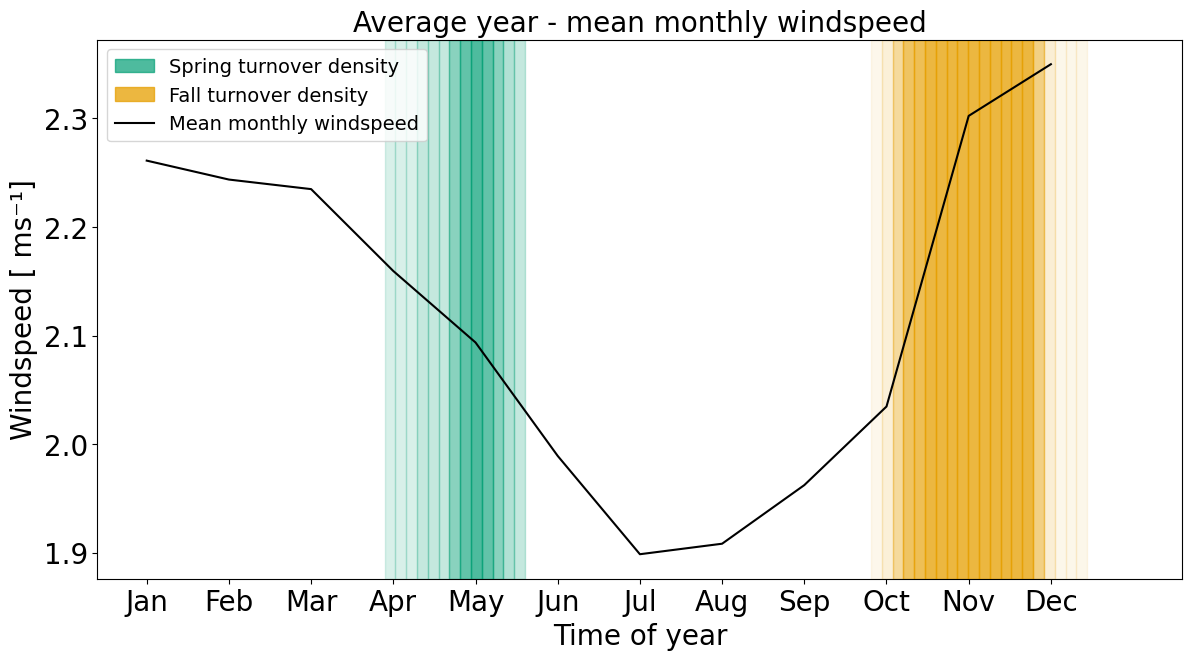

In [21]:
import numpy as np
import matplotlib.pyplot as plt
fontsize=20
x = np.linspace(0, 12, len(mean_turnovers.values.ravel()))

step_size = 4  # 
for i in range(0, 180, step_size):
    if i == 120:
        plt.axvspan(x[i], x[min(i + step_size, len(x) - 1)], color="#009e73", alpha=mean_turnovers.values.ravel()[i],label="Spring turnover density")
    else:
        plt.axvspan(x[i], x[min(i + step_size, len(x) - 1)], color="#009e73", alpha=mean_turnovers.values.ravel()[i])
for i in range(180, len(x) - 1, step_size):
    if i ==300:
        plt.axvspan(x[i], x[min(i + step_size, len(x) - 1)], color="#e69f00", alpha=mean_turnovers.values.ravel()[i],label="Fall turnover density")
    else:
        plt.axvspan(x[i], x[min(i + step_size, len(x) - 1)], color="#e69f00", alpha=mean_turnovers.values.ravel()[i])

plt.plot(range(12),MeanYear_wind_daily.windSpeed.resample("1m").mean(), color="k",label="Mean monthly windspeed")

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=np.arange(0, 12), labels=months)
plt.rcParams['figure.figsize'] = [14, 8]
plt.legend(fontsize=14)
plt.title("Average year - mean monthly windspeed",fontsize=fontsize)
plt.tick_params(axis='y', labelsize=fontsize)
plt.tick_params(axis='x', labelsize=fontsize)
plt.xlabel("Time of year", fontsize=fontsize)
plt.ylabel("Windspeed [ ms⁻¹]", fontsize=fontsize)
plt.savefig("average_year_windspeed.png",format="png")
plt.savefig("average_year_windspeed.pdf",format="pdf")

plt.show()


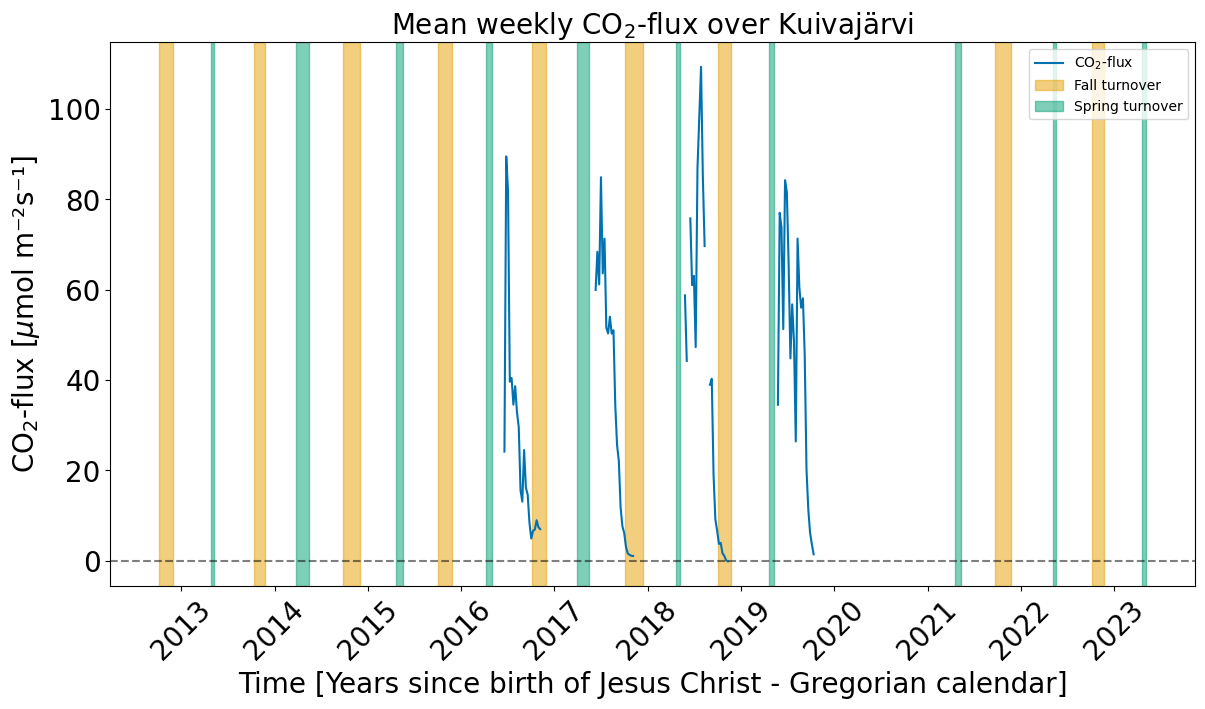

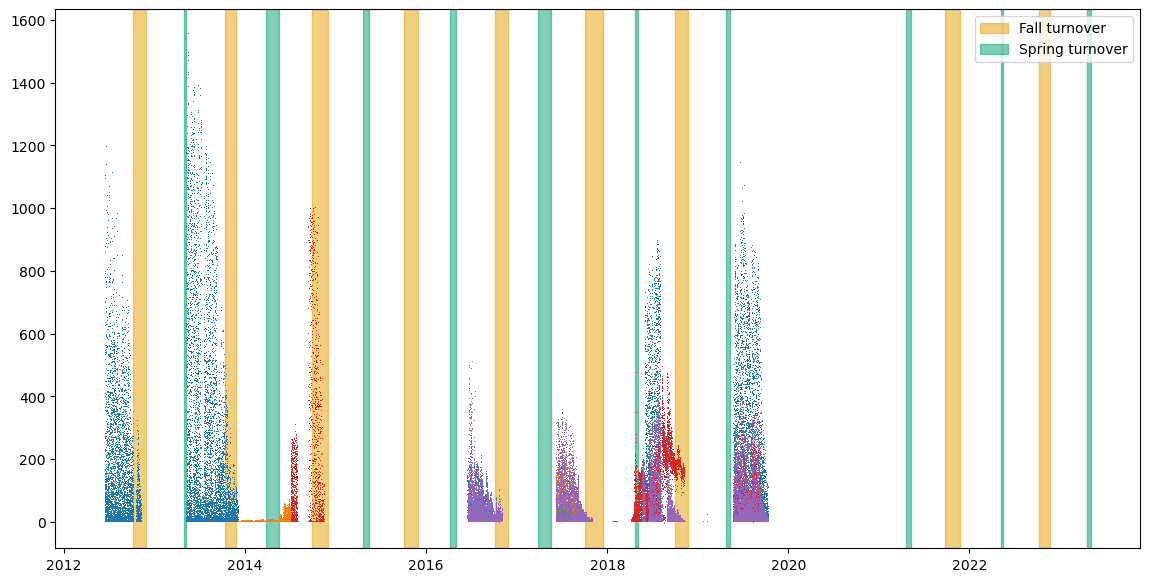

In [22]:
#par
tplot(par_data["KVJ_META.PARw05"].resample("1w").mean(), 
      "Mean weekly CO$_2$-flux over Kuivajärvi",
      "CO$_2$-flux [${\mu}$mol m⁻²s⁻¹]",
      "CO$_2$-flux",
      "figs/co2_flux",
      lines=True)
#for i in par_data:
#    par_data[i].plot(linestyle="",marker="o",label=i,alpha = .2)
#plt.legend()
plt.plot(par_data["KVJ_META.PARw02"],linestyle="",marker=",")
plt.plot(par_data["KVJ_META.PARw10"],linestyle="",marker=",")
plt.plot(par_data["KVJ_META.PARw20"],linestyle="",marker=",")
plt.plot(par_data["KVJ_META.PARw07"],linestyle="",marker=",")
plt.plot(par_data["KVJ_META.PARw05"],linestyle="",marker=",")

colors = ["#e69f00","#009e73"]
for i in range(0,len(turnover_periods),2):
    start_period = turnover_periods['datetime'].iloc[i]
    end_period = turnover_periods['datetime'].iloc[i + 1]
    if pd.notna(start_period):
        if i == 0:
            plt.axvspan(start_period, end_period, color=colors[int(np.floor(i%4)/2)],label="Fall turnover", alpha=0.5)
        elif i == 2:
            plt.axvspan(start_period, end_period, color=colors[int(np.floor(i%4)/2)],label="Spring turnover", alpha=0.5)
        else:
            plt.axvspan(start_period, end_period, color=colors[int(np.floor(i%4)/2)], alpha=0.5)
plt.legend()


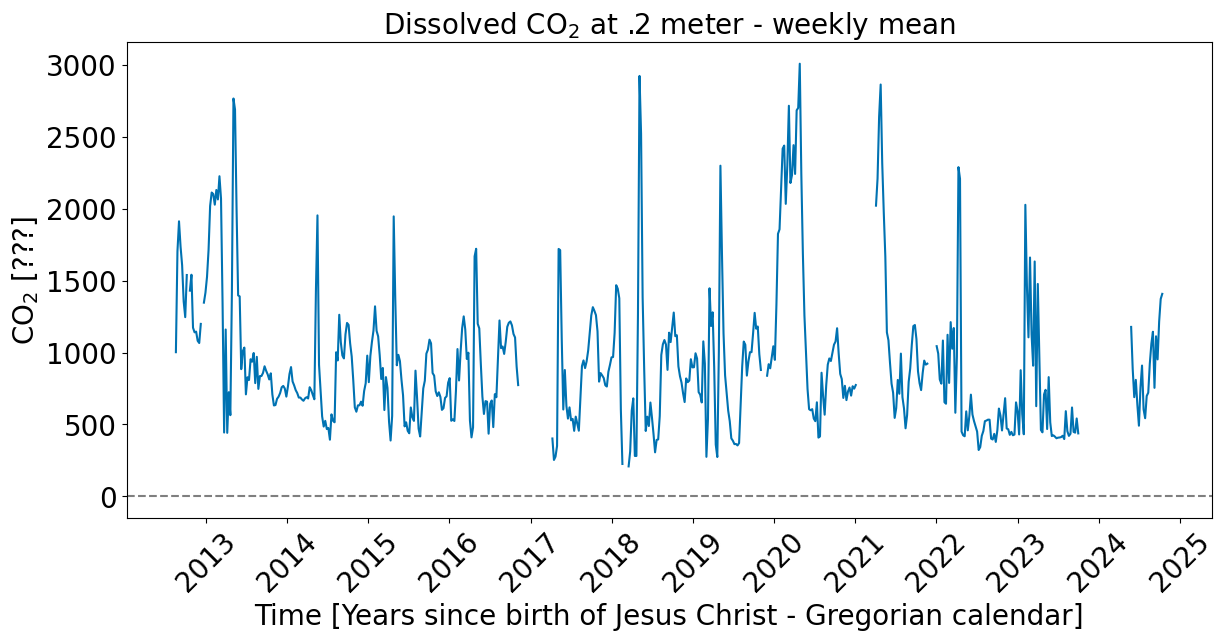

0

In [23]:
water_co2_data = pd.read_pickle("data/water_co2_kuivajarvi.pkl")
 
tplot(water_co2_data["KVJ_META.CO2w02"].resample("1w").mean(), 
      "Dissolved CO$_2$ at .2 meter - weekly mean",
      "CO$_2$ [???]",
      "CO$_2$ [???]",
      "figs/waterC02-timeseries20cm")

In [24]:
avg_year = flux_data["KVJ_EDDY.F_CO2_LI72"].where(flux_data["KVJ_EDDY.Qc_CO2_LI72"]==0).reset_index()
avg_year = avg_year[avg_year.timestamp.dt.strftime('%m-%d') != '02-29']
avg_year['doy'] = avg_year.timestamp.dt.dayofyear.values

avg_year = avg_year[['doy','KVJ_EDDY.F_CO2_LI72']]
avg_year = avg_year.groupby(['doy']).mean()
weekly_co2_flux = np.zeros(52)
for i in range(len(weekly_co2_flux)):
    weekly_co2_flux[i] = avg_year.values[i*7:i*7+7].mean()

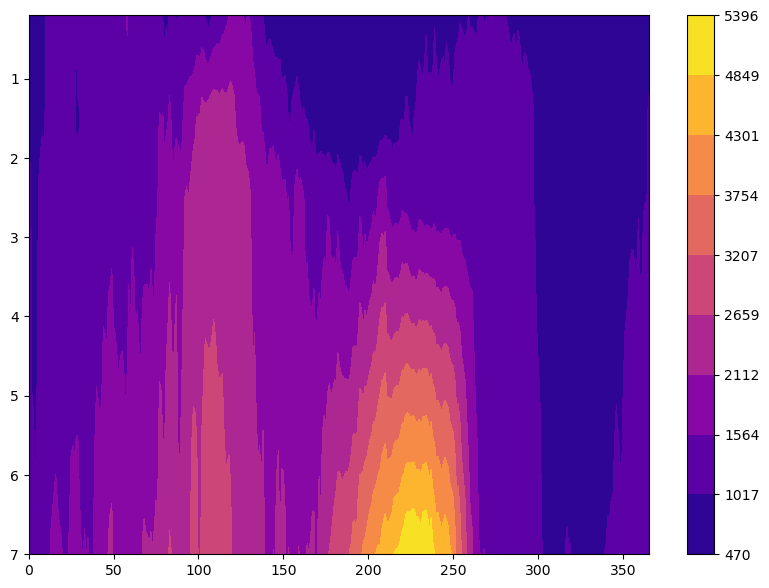

In [25]:
water_co2_avg_year = water_co2_data.reset_index()
water_co2_avg_year = water_co2_avg_year[water_co2_avg_year.timestamp.dt.strftime('%m-%d') != '02-29']
water_co2_avg_year['doy'] = water_co2_avg_year.timestamp.dt.dayofyear.values

water_co2_avg_year = water_co2_avg_year[['doy','KVJ_META.CO2w02',"KVJ_META.CO2w15","KVJ_META.CO2w25","KVJ_META.CO2w70"]]
water_co2_avg_year = water_co2_avg_year.groupby(['doy']).mean()

depths = np.array([.2,1.5,2.5,7])

plt.rcParams['figure.figsize'] = [14, 8]
X,Y = np.meshgrid(range(0,366),depths)
plt.show()

cmap = "plasma"
plt.figure(figsize=(10,7))
levels = np.linspace(water_co2_avg_year.values.min(),water_co2_avg_year.values.max(),10)
a = plt.contourf(X, Y, water_co2_avg_year.values.T, cmap=cmap,levels=levels)
plt.ylim(7,0.2)
plt.xlim(0,365)

cbar = plt.colorbar(a)
plt.show()


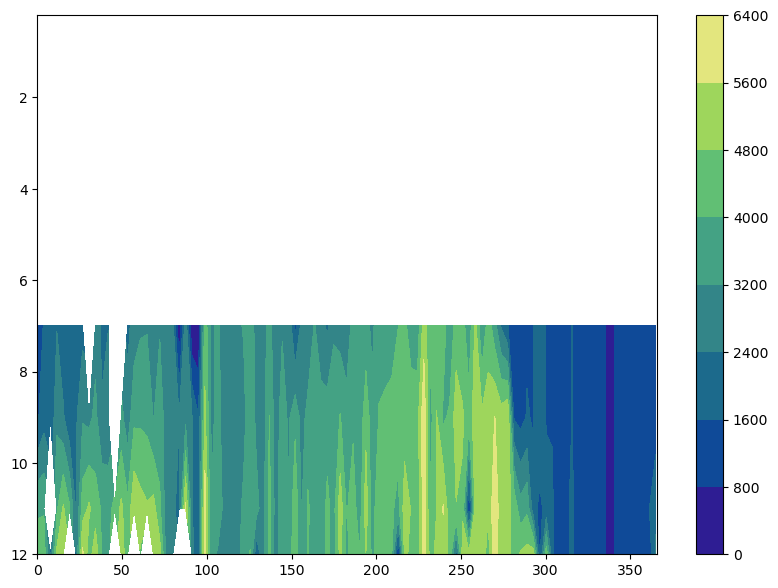

<Axes: xlabel='datetime'>

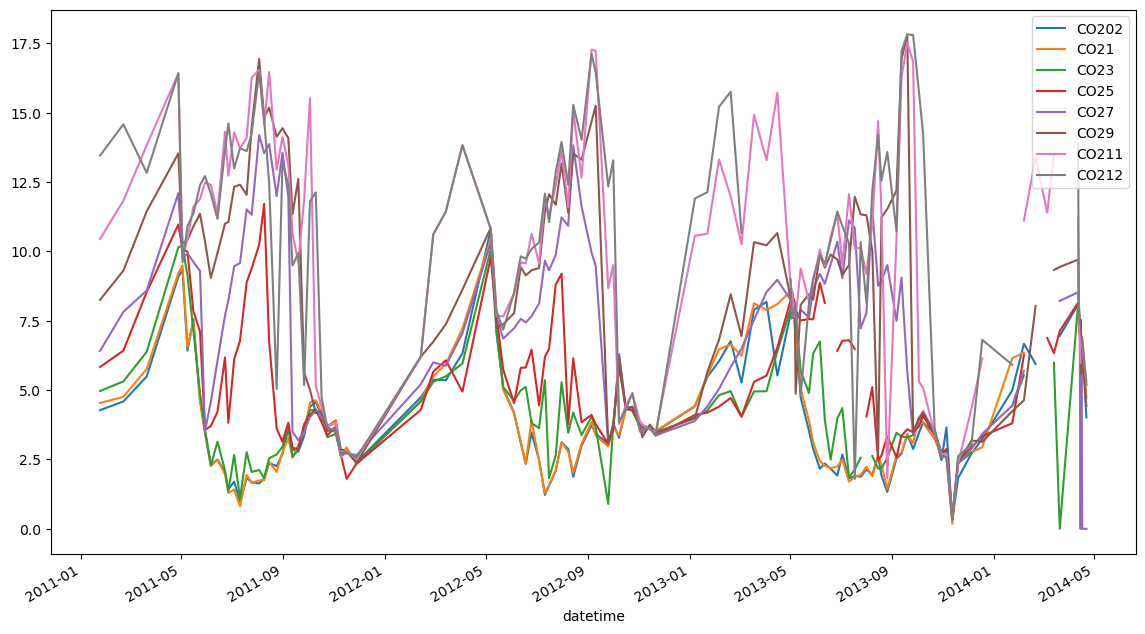

In [59]:
manual_water_co2_avg_year = manual_concentrations.reset_index()
manual_water_co2_avg_year = manual_water_co2_avg_year[manual_water_co2_avg_year.datetime.dt.strftime('%m-%d') != '02-29']
manual_water_co2_avg_year['doy'] = manual_water_co2_avg_year.datetime.dt.dayofyear.values

manual_water_co2_avg_year = manual_water_co2_avg_year[['doy','CO202',"CO21","CO23","CO25","CO27","CO29","CO211","CO212"]]
manual_water_co2_avg_year = manual_water_co2_avg_year.groupby(['doy']).mean()

depths = np.array([.2,1,3,5,7,9,11,12])

plt.rcParams['figure.figsize'] = [14, 8]
X1,Y1 = np.meshgrid(np.linspace(0,365,97),depths)


cmap = "plasma"
plt.figure(figsize=(10,7))
#levels = np.linspace(manual_water_co2_avg_year.values.min(),manual_water_co2_avg_year.values.max(),10)
cmap = cmocean.cm.haline
levels = np.linspace(np.min(water_co2_avg_year.values), 6400, 10)
a = plt.contourf(X1[-4:,:], Y1[-4:,:], manual_water_co2_avg_year.values.T[-4:,:]*368, cmap=cmap)
plt.ylim(12,0.2)
plt.xlim(0,366)

cbar = plt.colorbar(a)
plt.show()
#np.linspace(0,365,97

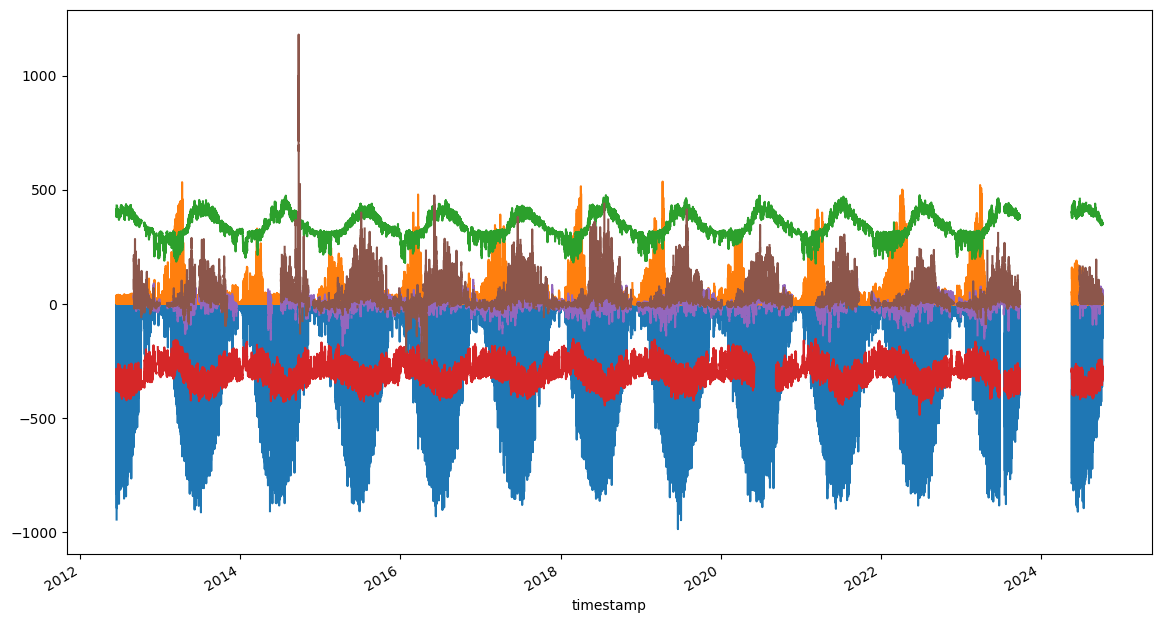

-8.822784391297391

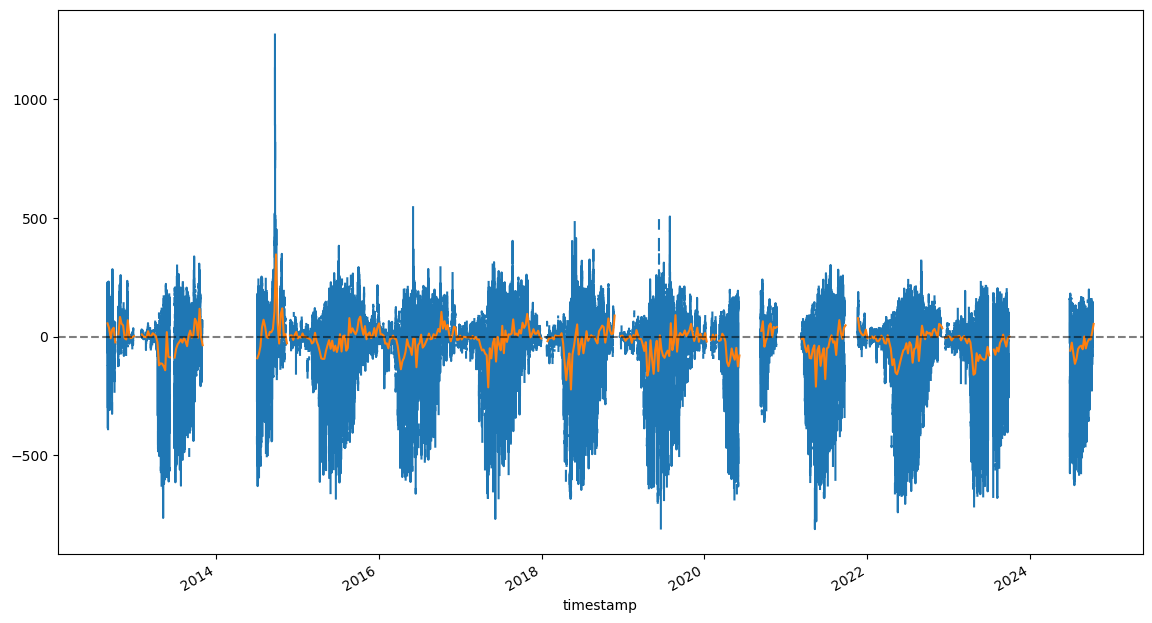

In [27]:


(-radiation_data["KVJ_META.Glob"]).plot()
radiation_data["KVJ_META.RGlob"].plot()
radiation_data["KVJ_META.LWout"].plot()
(-radiation_data["KVJ_META.LWin"]).plot()
flux_data["KVJ_EDDY.H"].where(flux_data["KVJ_EDDY.Qc_H"]==0).plot()
flux_data["KVJ_EDDY.LE_LI72"].where(flux_data["KVJ_EDDY.Qc_LE_LI72"]==0).plot()
plt.show()
(-radiation_data["KVJ_META.Glob"]+
radiation_data["KVJ_META.RGlob"]+
radiation_data["KVJ_META.LWout"]+
-radiation_data["KVJ_META.LWin"]+
flux_data["KVJ_EDDY.H"].where(flux_data["KVJ_EDDY.Qc_H"]==0)+
flux_data["KVJ_EDDY.LE_LI72"].where(flux_data["KVJ_EDDY.Qc_LE_LI72"]==0)).plot()

plt.plot((-radiation_data["KVJ_META.Glob"]+
radiation_data["KVJ_META.RGlob"]+
radiation_data["KVJ_META.LWout"]+
-radiation_data["KVJ_META.LWin"]+
flux_data["KVJ_EDDY.H"].where(flux_data["KVJ_EDDY.Qc_H"]==0)+
flux_data["KVJ_EDDY.LE_LI72"].where(flux_data["KVJ_EDDY.Qc_LE_LI72"]==0)).resample("1w").mean())
plt.axhline(y = 0,color="k",linestyle="--",alpha=.5)

(-radiation_data["KVJ_META.Glob"]+
radiation_data["KVJ_META.RGlob"]+
radiation_data["KVJ_META.LWout"]+
-radiation_data["KVJ_META.LWin"]+
flux_data["KVJ_EDDY.H"].where(flux_data["KVJ_EDDY.Qc_H"]==0)+
flux_data["KVJ_EDDY.LE_LI72"].where(flux_data["KVJ_EDDY.Qc_LE_LI72"]==0)).iloc[50000:102595].mean()

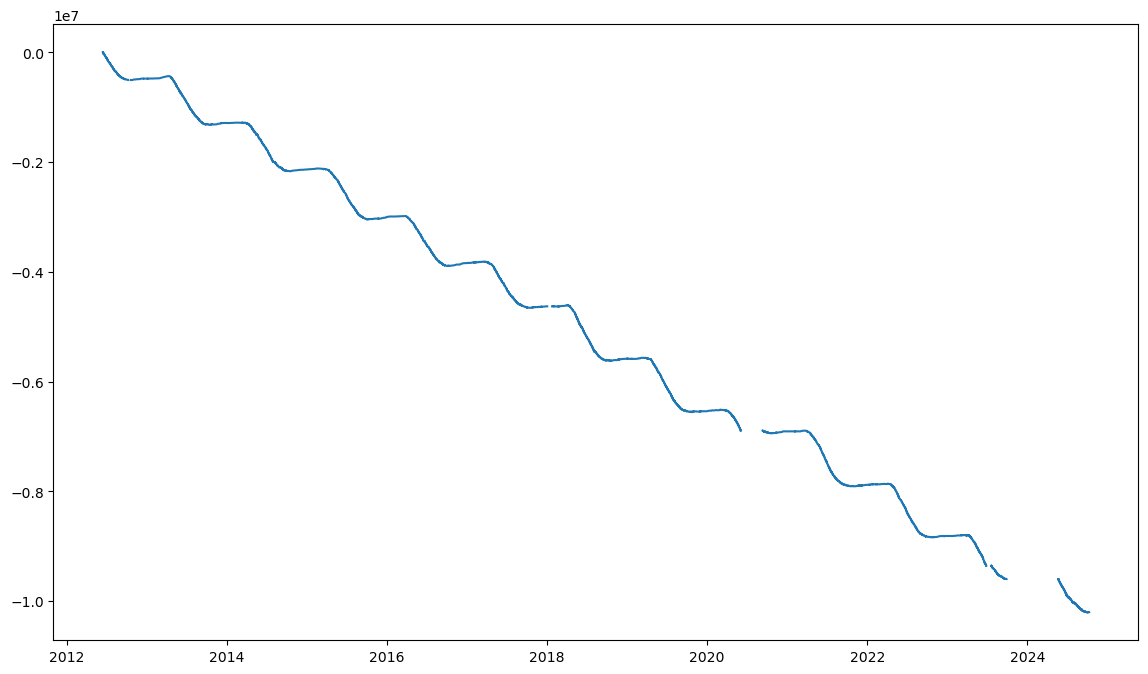

In [28]:
plt.plot(np.cumsum((-radiation_data["KVJ_META.Glob"]+
radiation_data["KVJ_META.RGlob"]+
radiation_data["KVJ_META.LWout"]+
-radiation_data["KVJ_META.LWin"])))
#flux_data["KVJ_EDDY.H"].where(flux_data["KVJ_EDDY.Qc_H"]==0)+
#flux_data["KVJ_EDDY.LE_LI72"].where(flux_data["KVJ_EDDY.Qc_LE_LI72"]==0)).resample("1w").mean()))
#plt.axhline(y = 0,color="k",linestyle="--",alpha=.5)

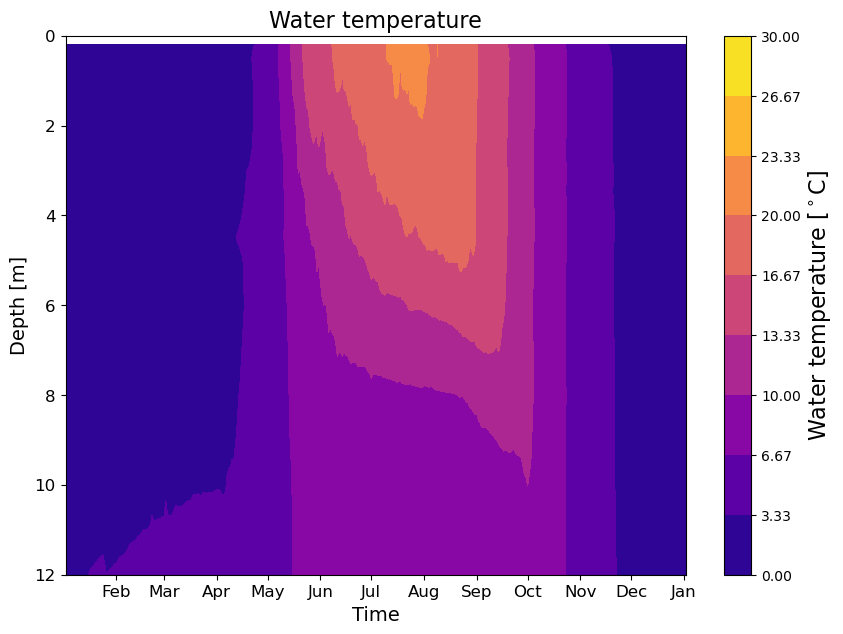

In [29]:
import datetime
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time
import xarray as xr

from matplotlib import colors


avg_year = water_temps.reset_index()

avg_year = avg_year[avg_year.datetime.dt.strftime('%m-%d') != '02-29']
avg_year['doy'] = avg_year.datetime.dt.dayofyear.values

avg_year = avg_year[['doy','depth','values']]
avg_year = avg_year.groupby(['doy','depth']).mean()
avg_year = avg_year.sort_index(level='depth')
avg_year.to_pickle("data/avgYearTemp.pkl")
# for d in np.unique(avg_year.index.get_level_values(1)):
#     plt.title(str(d))
#     level_temp = avg_year[avg_year.index.get_level_values(1) == d]
#     plt.plot(level_temp.index.get_level_values(0), level_temp.values,label='depth = '+str(d))
#     plt.ylim(0,25)
#     plt.show()

t = len(np.unique(avg_year.index.get_level_values(0)))
d = 16
z = avg_year.values.reshape(d, t)
x=np.unique(avg_year.index.get_level_values(0))
y=np.unique(avg_year.index.get_level_values(1))
X, Y = np.meshgrid(x,y)
 
cmap = "plasma"
plt.figure(figsize=(10,7))
levels = np.linspace(0,30,10)
a = plt.contourf(X, Y, z, cmap=cmap, levels=levels)
plt.title('Water temperature',fontsize=16)
plt.xlabel('Time',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylabel('Depth [m]',fontsize=14)
plt.ylim(12,0)

# Format the x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks on the first day of each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Month names (e.g., Jan, Feb)

cbar = plt.colorbar(a)
cbar.set_label('Water temperature [$^\circ$C]',fontsize=16)
plt.show()


In [30]:
avg_year = flux_data["KVJ_EDDY.F_CO2_LI72"].where(flux_data["KVJ_EDDY.Qc_CO2_LI72"]==0).reset_index()
avg_year = avg_year[avg_year.timestamp.dt.strftime('%m-%d') != '02-29']
print(avg_year)
avg_year['doy'] = avg_year.timestamp.dt.dayofyear.values

avg_year = avg_year[['doy','KVJ_EDDY.F_CO2_LI72']]

avg_year = avg_year.groupby(['doy']).mean()


                 timestamp  KVJ_EDDY.F_CO2_LI72
0      2012-01-01 00:00:00                  NaN
1      2012-01-01 00:30:00                  NaN
2      2012-01-01 01:00:00                  NaN
3      2012-01-01 01:30:00                  NaN
4      2012-01-01 02:00:00                  NaN
...                    ...                  ...
223867 2024-10-08 21:30:00              1.52307
223868 2024-10-08 22:00:00              1.12112
223869 2024-10-08 22:30:00              1.26988
223870 2024-10-08 23:00:00              0.30663
223871 2024-10-08 23:30:00              0.42012

[223680 rows x 2 columns]


In [31]:
avg_year = water_temps.reset_index()
avg_year = avg_year[avg_year.datetime.dt.strftime('%m-%d') != '02-29']
avg_year['doy'] = avg_year.datetime.dt.dayofyear.values

avg_year = avg_year[['doy','depth','values']]
avg_year = avg_year.groupby(['doy','depth']).mean()
avg_year = avg_year.sort_index(level='depth')

[316.4256786 310.5322581 284.2543856 496.6348229 469.4756043 650.5824486
 958.655807  701.3782822 482.4145636 574.8909528 750.8546211 276.8850631] [18.63730202 19.50255874 19.29627738 17.81655487 18.2936801  16.89457822
 19.66705363 18.54350175         nan 20.5103744  19.59455967 18.48160842]
[ True  True  True  True  True  True  True  True False  True  True  True]


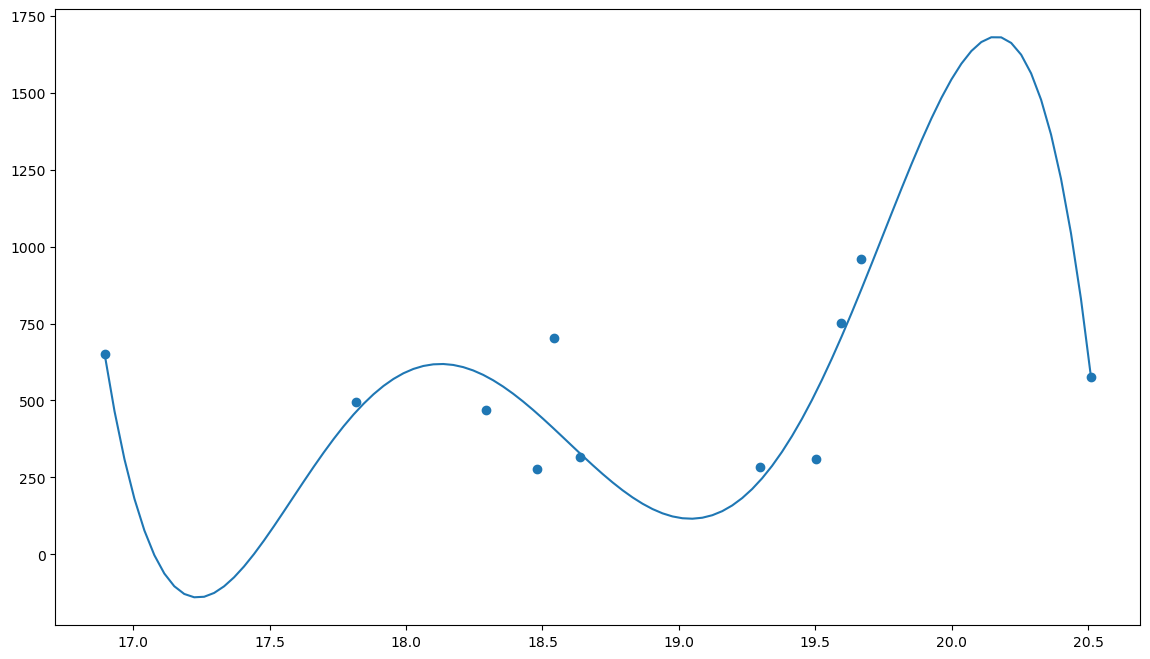

In [32]:
level = 12
start = 2
intermediate_water_temp = water_temps.reset_index().set_index("datetime")
test = intermediate_water_temp.where(intermediate_water_temp.depth==0.2).resample("Q-NOV").mean().drop("depth",axis=1).values[start::4]
#test = radiation_data["KVJ_META.Glob"].resample("Q-NOV").mean().values[start::4]
tot_co2_flux = np.array([
316.4256786,
310.5322581,
284.2543856,
496.6348229,
469.4756043,
650.5824486,
958.655807,
701.3782822,
482.4145636,
574.8909528,
750.8546211,
276.8850631])

plt.scatter(test,tot_co2_flux)
print(tot_co2_flux,test.ravel())
idx = np.isfinite(test.ravel()) & np.isfinite(tot_co2_flux)
print(idx)
polything = np.polyfit(test.ravel()[idx],tot_co2_flux[idx],5)
x=np.linspace(np.nanmin(test),np.nanmax(test),100)
y=np.polyval(polything,x)
plt.plot(x,y)
plt.show()

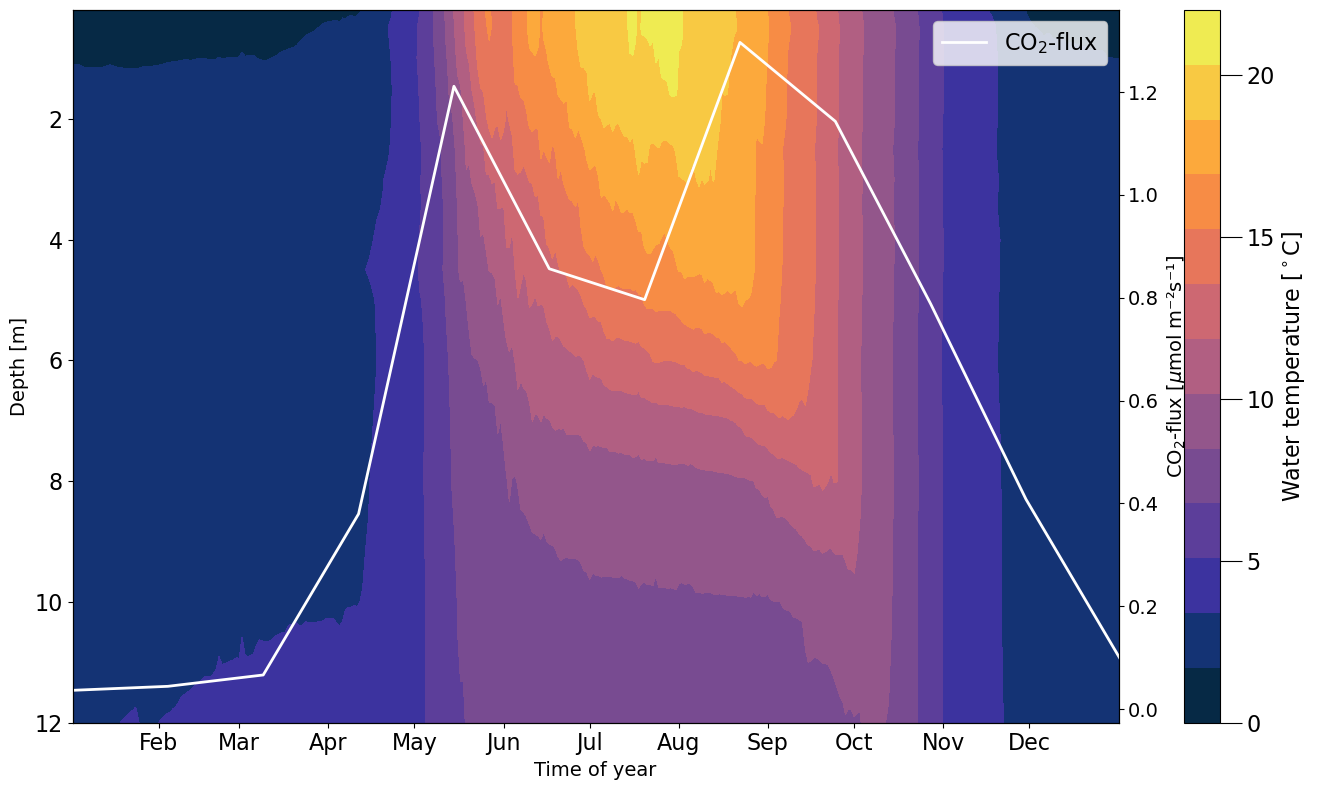

In [48]:

t = len(np.unique(avg_year.index.get_level_values(0)))
d = 16
z = avg_year.values.reshape(d, t)
x=np.unique(avg_year.index.get_level_values(0))
y=np.unique(avg_year.index.get_level_values(1))
X, Y = np.meshgrid(x,y)
fontsize= 16


# Define the colormap and levels for contour plot
cmap = cmocean.cm.thermal
levels = np.linspace(0, 22, 14)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Time of year', fontsize=14)
ax1.set_ylabel('Depth [m]', fontsize=14)
a = ax1.contourf(X, Y, z, cmap=cmap, levels=levels)

colorbar_ticks = [0, 5, 10, 15, 20]
cbar = plt.colorbar(a, ax=ax1, ticks=colorbar_ticks)#, orientation="horizontal")
cbar.set_label('Water temperature [$^\circ$C]', fontsize=fontsize)

cbar.ax.tick_params(labelsize=fontsize)
cbar.ax.tick_params(size=fontsize)

ax1.set_ylim(12, 0.2)
ax1.tick_params(axis='y', labelsize=fontsize)

ax2 = ax1.twinx()
ax2.set_ylabel('CO$_2$-flux [${\mu}$mol m⁻²s⁻¹]', fontsize=14)
ax2.plot(np.linspace(1, 366, 12), monthly_co2, color="white", lw=2, label="CO$_2$-flux")  # Monthly CO2 flux data
ax2.tick_params(axis='y', labelsize=14)

ax1.xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks at the first day of each month
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as month names
ax1.set_xlim(1, 364.99999)
ax1.tick_params(labelsize=fontsize, axis="x")


plt.rcParams['figure.figsize'] = [14, 8]
#plt.title("Average year temperature profile and CO$_2$-flux", fontsize=fontsize)

fig.tight_layout()
plt.legend(fontsize=fontsize)
plt.savefig("figs/averageYearTempCo2flux.png",format="png")
plt.savefig("figs/averageYearTempCo2flux.pdf",format="pdf")

plt.show()


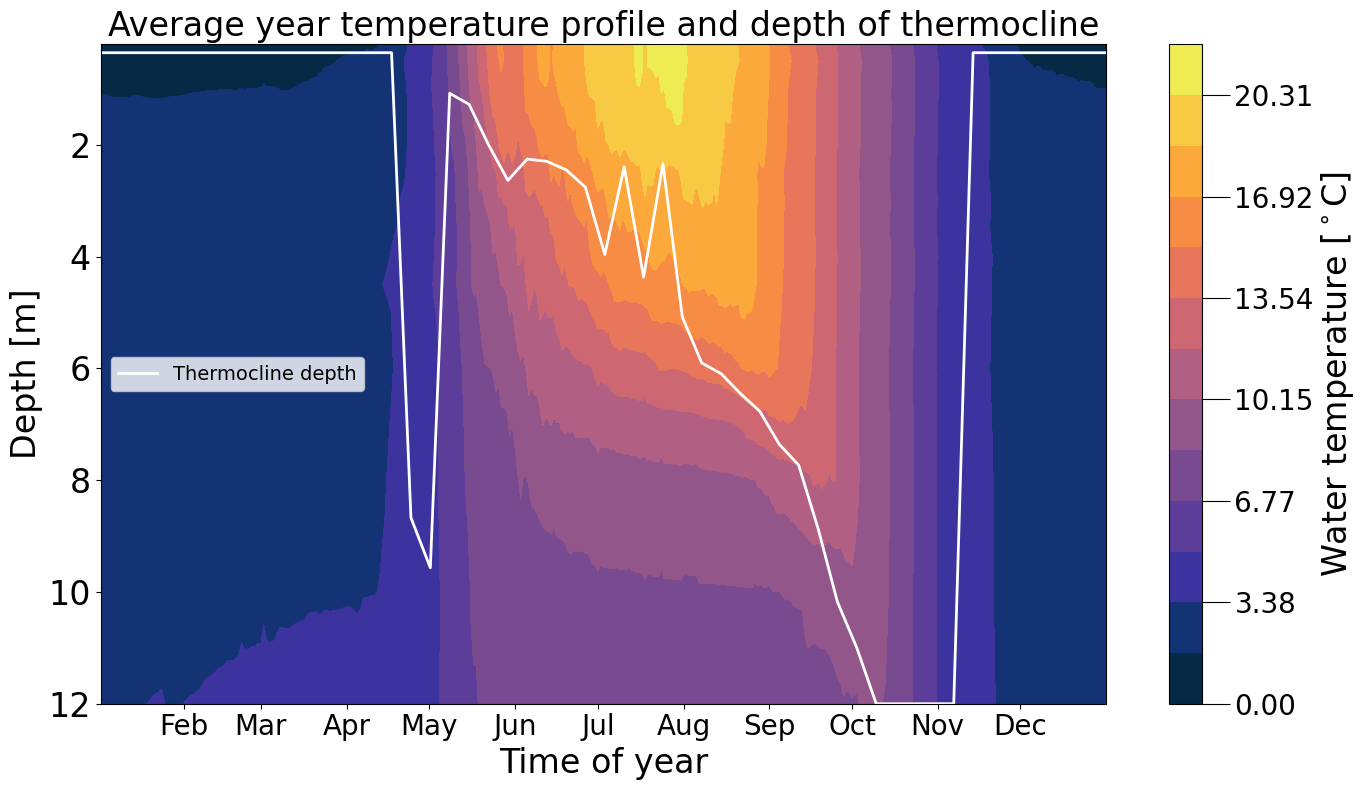

In [53]:

t = len(np.unique(avg_year.index.get_level_values(0)))
d = 16
z = avg_year.values.reshape(d, t)
x=np.unique(avg_year.index.get_level_values(0))
y=np.unique(avg_year.index.get_level_values(1))
X, Y = np.meshgrid(x,y)
fontsize= 24

import cmocean
# Define the colormap and levels for contour plot
cmap = cmocean.cm.thermal
levels = np.linspace(0, 22, 14)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Time of year', fontsize=fontsize)
ax1.set_ylabel('Depth [m]', fontsize=fontsize)
a = ax1.contourf(X, Y, z, cmap=cmap, levels=levels)

cbar = plt.colorbar(a, ax=ax1)
cbar.set_label('Water temperature [$^\circ$C]', fontsize=fontsize)

cbar.ax.tick_params(labelsize=20)
cbar.ax.tick_params(size=20)

ax1.set_ylim(12, 0.2)
ax1.tick_params(axis='y', labelsize=fontsize)


ax1.plot(np.linspace(1, 366, len(mean_tc.thermD.values)), mean_tc.thermD.values, color="white", lw=2,label="Thermocline depth")
#ax1.plot(np.linspace(1, 366, len(biweekly_thermocline)), biweekly_thermocline, color="white", lw=2,label="Thermocline depth") # Monthly CO2 flux data
ax1.tick_params(axis='y', labelsize=fontsize)

ax1.xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks at the first day of each month
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as month names
ax1.set_xlim(1, 364.99999)
ax1.tick_params(labelsize=20, axis="x")

plt.rcParams['figure.figsize'] = [14, 8]
plt.title("Average year temperature profile and depth of thermocline", fontsize=fontsize)
plt.legend(fontsize=14,loc="center left")
fig.tight_layout()
plt.savefig("figs/averageYearTempThermocline.png",format="png")
#plt.savefig("figs/averageYearTempCo2flux.png",format="pdf")

plt.show()


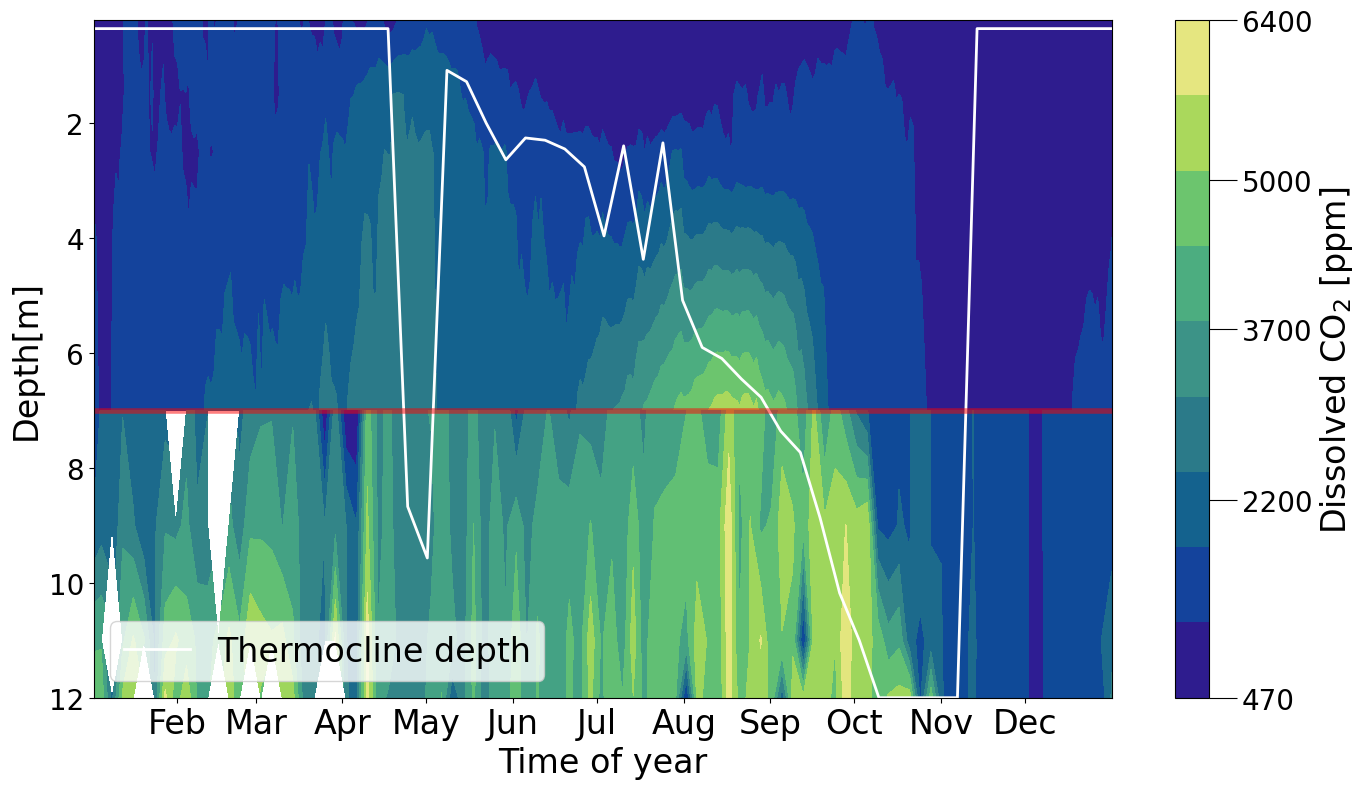

In [57]:
x=np.unique(water_co2_avg_year.index.get_level_values(0))
depths = np.array([.2,1.5,2.5,7])
X, Y = np.meshgrid(x,depths)
cmap = cmocean.cm.haline
levels = np.linspace(np.min(water_co2_avg_year.values), 6400, 10)
fontsize=24

fig, ax1 = plt.subplots()

ax1.set_xlabel('Time of year', fontsize=fontsize)
ax1.set_ylabel('Depth [m]', fontsize=fontsize)
a = ax1.contourf(X, Y, water_co2_avg_year.values.T, cmap=cmap, levels=levels)
plt.contourf(X1[-4:,:], Y1[-4:,:], manual_water_co2_avg_year.values.T[-4:,:]*368, cmap=cmap)

colorbar_ticks = [470, 2200, 3700, 5000, 6400]
cbar = plt.colorbar(a, ax=ax1, ticks=colorbar_ticks)

cbar.set_label("Dissolved CO$_2$ [ppm]", fontsize=fontsize)

cbar.ax.tick_params(labelsize=20)
cbar.ax.tick_params(size=20)

ax1.set_ylim(12, 0.2)
ax1.tick_params(axis='y', labelsize=20)

# Create a second y-axis (ax2) for CO2 flux
ax1.set_ylabel('Depth[m]', fontsize=fontsize)
ax1.plot(np.linspace(1, 366, len(mean_tc.thermD.values)), mean_tc.thermD.values, color="white", lw=2, label="Thermocline depth")  # Monthly CO2 flux data
ax2.tick_params(axis='y', labelsize=20)

# Format the x-axis to show months
ax1.xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks at the first day of each month
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as month names
ax1.set_xlim(1, 364.999)
ax1.tick_params(labelsize=fontsize, axis="x")

# Set figure size and title
plt.rcParams['figure.figsize'] = [14, 8]
#plt.title("Average year CO$_2$-consentration and depth of thermocline", fontsize=24)

# Automatically adjust layout to prevent overlap
fig.tight_layout()
ax1.axhline(y = 7,color="r",linestyle="-",alpha=.5,lw=4)
plt.legend(fontsize=fontsize)
plt.savefig("figs/averageYearCo2Cnsflux.png",format="png")
plt.savefig("figs/averageYearCo2consflux.pdf",format="pdf")


plt.show()


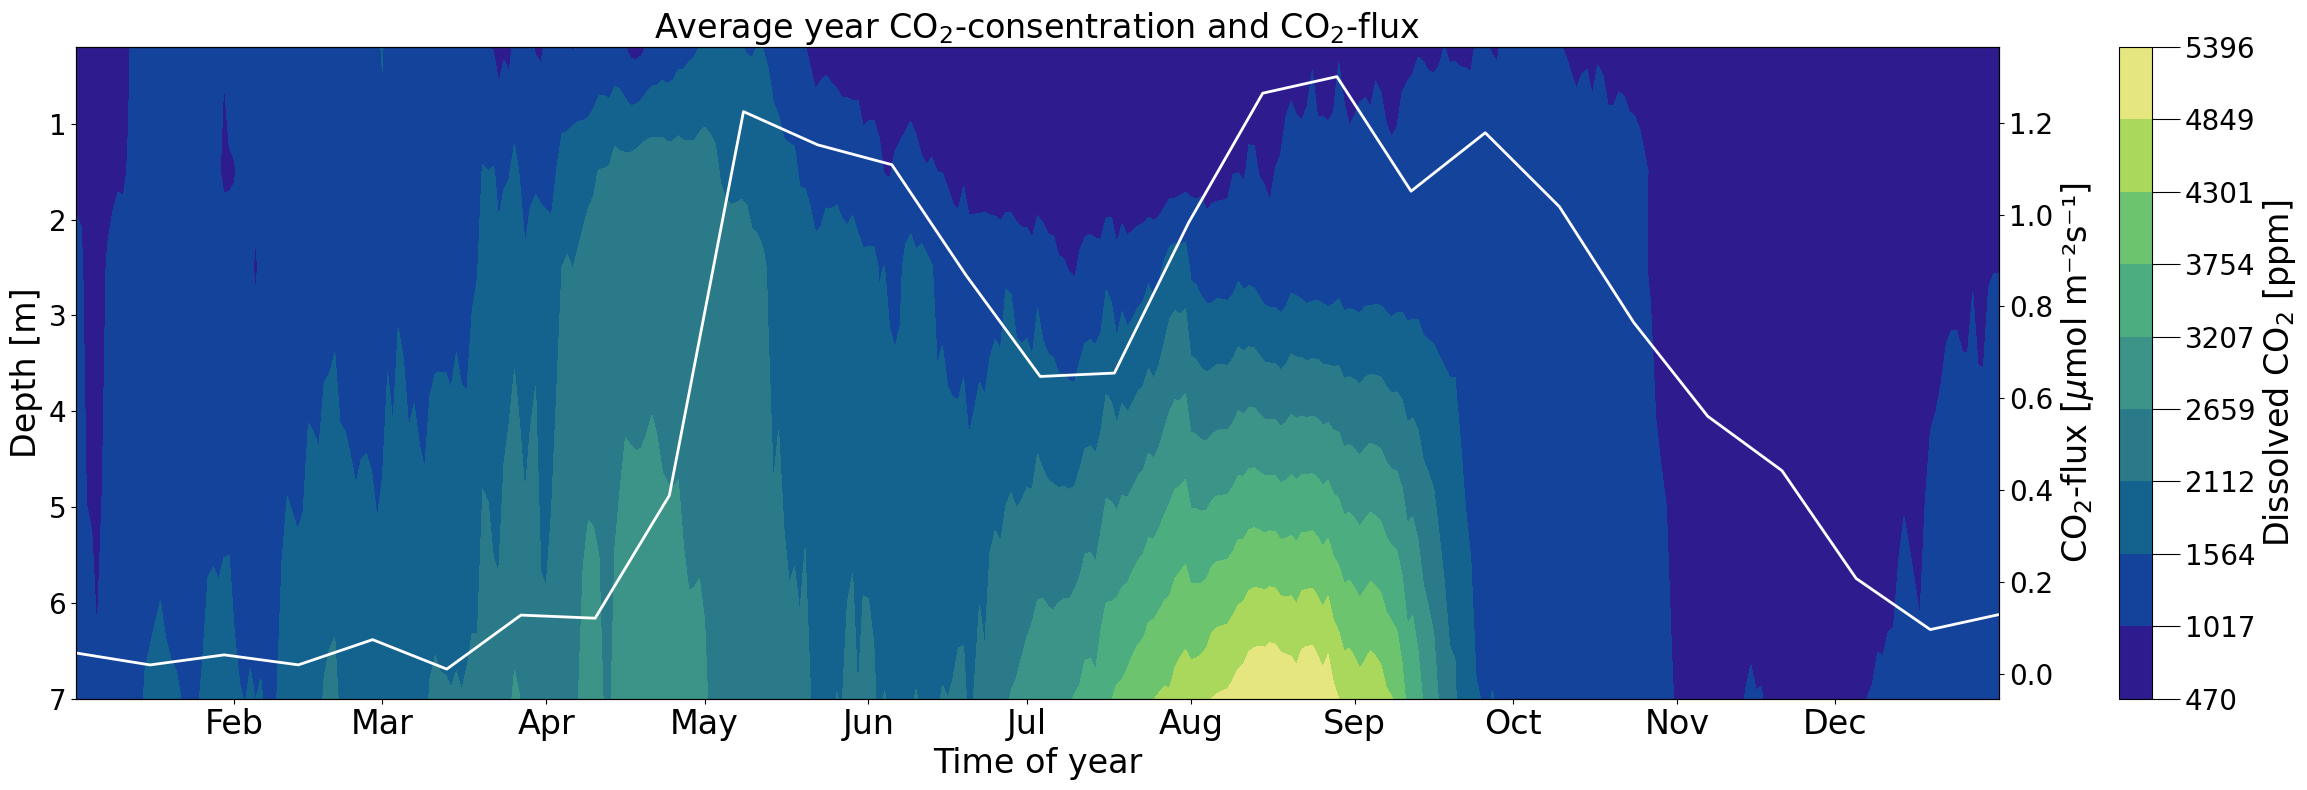

In [36]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Create some mock data


# fig, ax1 = plt.subplots()


# color = 'tab:red'
# ax1.set_xlabel('Time of year',fontsize=20)
# ax1.set_ylabel('Depth',fontsize=20)
# ax1.contourf(X, Y, avg_year.values.T, cmap=cmap, levels=levels)
# plt.ylim(7,0.2)
# plt.yticks(fontsize =20)

# ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis


# ax2.set_ylabel('CO$_2$-flux',fontsize=20)  # we already handled the x-label with ax1
# #ax2.plot(range(366), avg_year.values, color="white")
# ax2.plot(np.linspace(1,366,12),intermediate2, color="white")#monthly
# #ax2.plot(np.linspace(1,366,52),weekly_co2_flux, color="white")
# ax2.tick_params(axis='y')
# plt.yticks(fontsize =20)


# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# # Format the x-axis to show months
# plt.xticks(fontsize=20)
# ax1.xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks on the first day of each month
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Month names (e.g., Jan, Feb)
# ax1.tick_params(labelsize=20, axis="x")
# ax1.set_xlim(0, 364.99999)
# # plt.rcParams['figure.figsize'] = [14, 8]

# plt.title("TITLE!")
# plt.setp(plt.gca().get_xticklabels(), fontsize=40)

# plt.show()

x=np.unique(water_co2_avg_year.index.get_level_values(0))
depths = np.array([.2,1.5,2.5,7])
X, Y = np.meshgrid(x,depths)
cmap = cmocean.cm.haline
levels = np.linspace(np.min(water_co2_avg_year.values), np.max(water_co2_avg_year.values), 10)
fontsize=24

fig, ax1 = plt.subplots()

ax1.set_xlabel('Time of year', fontsize=fontsize)
ax1.set_ylabel('Depth [m]', fontsize=fontsize)
a = ax1.contourf(X, Y, water_co2_avg_year.values.T, cmap=cmap, levels=levels)

cbar = plt.colorbar(a, ax=ax1)
cbar.set_label("Dissolved CO$_2$ [ppm]", fontsize=fontsize)

cbar.ax.tick_params(labelsize=20)
cbar.ax.tick_params(size=20)

ax1.set_ylim(7, 0.2)
ax1.tick_params(axis='y', labelsize=20)

# Create a second y-axis (ax2) for CO2 flux
ax2 = ax1.twinx()
ax2.set_ylabel('CO$_2$-flux [${\mu}$mol m⁻²s⁻¹]', fontsize=fontsize)
ax2.plot(np.linspace(1, 366, len(biweekly_co2)), biweekly_co2, color="white", lw=2)  # Monthly CO2 flux data
ax2.tick_params(axis='y', labelsize=20)

# Format the x-axis to show months
ax1.xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks at the first day of each month
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as month names
ax1.set_xlim(1, 364.999)
ax1.tick_params(labelsize=fontsize, axis="x")

# Set figure size and title
plt.rcParams['figure.figsize'] = [25, 8]
plt.title("Average year CO$_2$-consentration and CO$_2$-flux", fontsize=24)

# Automatically adjust layout to prevent overlap
fig.tight_layout()
plt.savefig("figs/averageYearCo2Cnsflux.png",format="png")
plt.savefig("figs/averageYearCo2consflux.png",format="pdf")

plt.show()
